In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SD=pd.read_csv("E:/DataSet/Salary_Data.csv")
SD.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [3]:
X=pd.DataFrame(SD["YearsExperience"])
Y=pd.DataFrame(SD["Salary"])

In [4]:
from sklearn.preprocessing import MinMaxScaler
array=Y.values
scaler=MinMaxScaler(feature_range=(0,1))
Y_scaled=scaler.fit_transform(array)

In [5]:
SD.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x22560c391c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22560c39880>,
 'boxes': [<matplotlib.lines.Line2D at 0x22560c29e20>],
 'medians': [<matplotlib.lines.Line2D at 0x22560c39f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x22560c462e0>],
 'means': []}

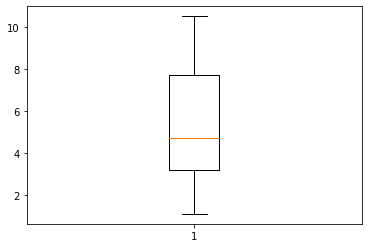

In [6]:
plt.boxplot(X)

{'whiskers': [<matplotlib.lines.Line2D at 0x22560cde9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22560ce90a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22560cde640>],
 'medians': [<matplotlib.lines.Line2D at 0x22560ce9760>],
 'fliers': [<matplotlib.lines.Line2D at 0x22560ce9ac0>],
 'means': []}

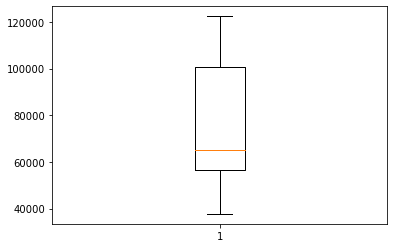

In [7]:
plt.boxplot(Y)

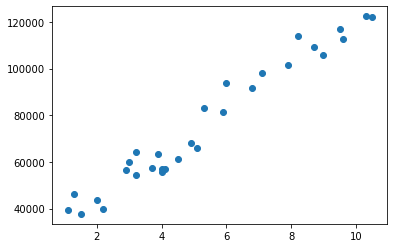

In [8]:
plt.scatter(X,Y)

In [9]:
SD.YearsExperience.corr(SD.Salary)

0.9782416184887599

In [10]:
import statsmodels.formula.api as smf
model1=smf.ols("Y_scaled~X", data=SD).fit()
model1.params

Intercept   -0.141021
X            0.111623
dtype: float64

In [11]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Y_scaled   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        21:48:06   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1410      0.027     -5.252      0.000      -0.196      -0.086
X              0.1116      0.004     24.950      0.000       0.102       0.121
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pred1=model1.predict(Y)
pred1

0    -0.018236
1     0.004089
2     0.026413
3     0.082224
4     0.104549
5     0.182685
6     0.193847
7     0.216172
8     0.216172
9     0.271983
10    0.294307
11    0.305470
12    0.305470
13    0.316632
14    0.361281
15    0.405930
16    0.428254
17    0.450579
18    0.517552
19    0.528715
20    0.618013
21    0.651499
22    0.740797
23    0.774284
24    0.830095
25    0.863582
26    0.919393
27    0.930556
28    1.008691
29    1.031016
dtype: float64

In [15]:
rmse1=np.sqrt(np.mean((np.array(Y_scaled)-np.array(pred1))**2))
rmse1

0.4453791978760461

In [29]:
model2=smf.ols("Y_scaled~np.log(X)", data=SD).fit()
model2.params

Intercept   -0.269348
np.log(X)    0.479353
dtype: float64

In [31]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Y_scaled   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           3.25e-13
Time:                        22:04:25   Log-Likelihood:                 20.618
No. Observations:                  30   AIC:                            -37.24
Df Residuals:                      28   BIC:                            -34.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2693      0.061     -4.422      0.000      -0.394      -0.145
np.log(X)      0.4794      0.037     12.792      0.000       0.403       0.556
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred2=model2.predict(Y)
rmse2=np.sqrt(np.mean((np.array(Y_scaled)-np.array(pred2))**2))
rmse2

0.43349208734784567